In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.metrics import r2_score

### Загружаем dataset

In [2]:
boston = fetch_openml(data_id=42165)

### Смотрим на размер выборки

In [3]:
boston.data.shape

(1460, 80)

In [4]:
y = boston.target
X = boston.data[boston.data.columns[boston.data.dtypes != 'object']]

### Выполняем предварительную обработку данных

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
min_max_scaler = MinMaxScaler()

In [7]:
X = min_max_scaler.fit_transform(X)

### Разбиваем выборку на train и test

In [8]:
from sklearn.model_selection import train_test_split, cross_val_predict

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Выбираем модель для обучения

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
mdl_lr = LinearRegression()

In [13]:
mdl = DecisionTreeRegressor(max_depth=4, random_state=0)

In [14]:
metric = []
for n_trees in range(1,30):
    mdl = DecisionTreeRegressor(max_depth=n_trees, random_state=0)
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    metric.append(r2_score(y_pred=y_pred, y_true=y_test))
    

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
is_na_train = np.any(np.isnan(X_train), axis=1)
is_na_test = np.any(np.isnan(X_test), axis=1)

mdl_lr = mdl_lr.fit(X_train[~is_na_train], y_train[~is_na_train])
y_pred_lr = mdl_lr.predict(X_test[~is_na_test])

print(f'LinearRegression R2 Score - {r2_score(y_pred=y_pred_lr, y_true=y_test[~is_na_test])}')

LinearRegression R2 Score - 0.7115048778533569


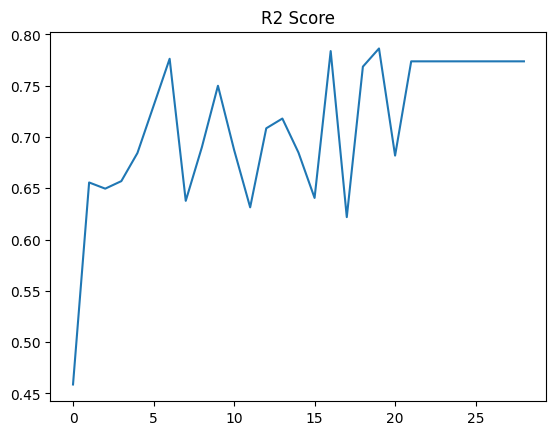

In [17]:
plt.plot(metric[:100])

plt.title('R2 Score')

plt.show()

### Выполняем обучение модели

In [18]:
%%capture
mdl.fit(X_train, y_train)

### Предсказываем результаты на test't

In [19]:
y_pred = mdl.predict(X_test)

In [20]:
y_test[:5]

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

In [21]:
y_pred[:5]

array([138500., 410000., 120000., 210000., 328900.])

In [22]:
r2_score(y_pred=y_pred, y_true=y_test)

0.7737833047552993